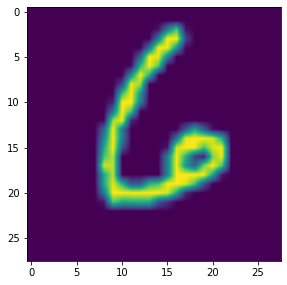

In [11]:
import pickle
import gzip
import matplotlib.pyplot as plt

f = gzip.open('mnist.pkl.gz')
data = pickle.load(f,encoding='latin1')
train_set, valid_set, test_set  = data #unpakcing

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(121)
batch_num = 1 # there are 3 batches of images with labels --> I guess there are 50000 images for train batch and 4000 images in the second batch for validation
i =2 # first image out of 50000 images
first_image =  data[batch_num][0][i].reshape((28, 28)) # if you get the len(data[0][0][0]) you see its 784 and its an array so reshape it to 28*28
ax1.imshow(first_image, interpolation='bilinear')
plt.show()

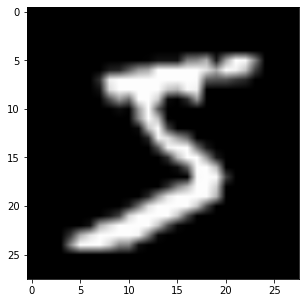

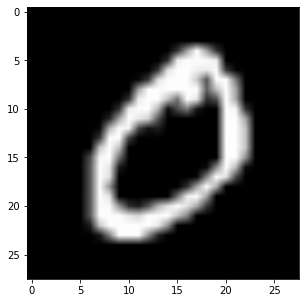

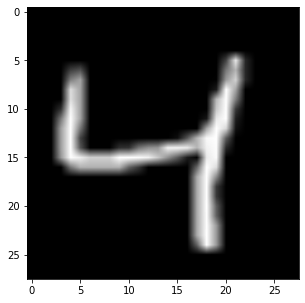

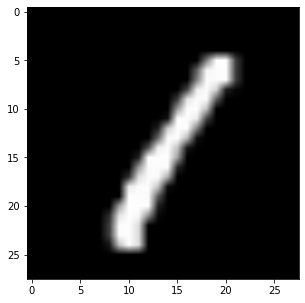

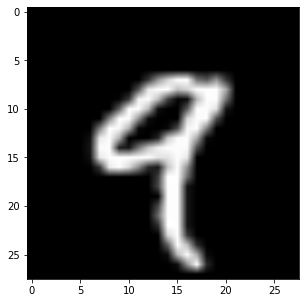

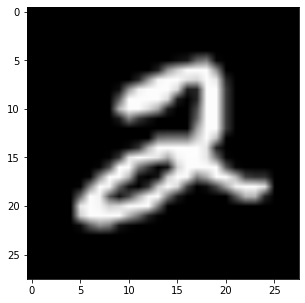

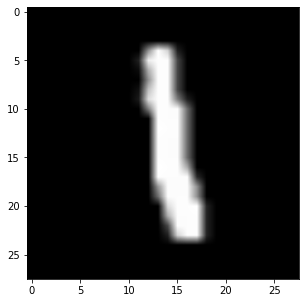

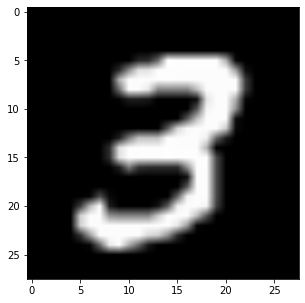

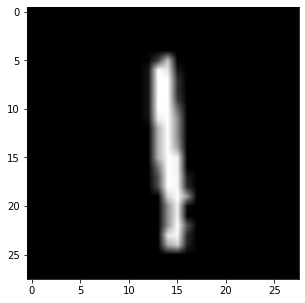

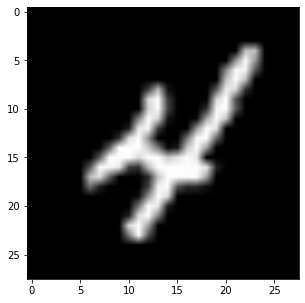

In [12]:
#we have 5000 pictures which is len(data[0][0])
# we use data variable for indexing and thats why we need to do index 3 things to reach the picture
num = 10 # plot 100 images
image_array =  [data[0][0][i].reshape((28, 28)) for i in range(50000)    ] # if you get the len(data[0][0][0]) you see its 784 and its an array so reshape it to 28*28
for i in range(num):
    fig = plt.figure(figsize=(5,5))
    plt.imshow(image_array[i], interpolation='bilinear' , cmap='gray')
    plt.show()

In [14]:
# simple neural network ---> just a play ground before implmenting it in a real editor
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd

x,y = train_set
x = torch.tensor(x[:100]) 
y = torch.tensor(y[:100])

each_pic_size = 28*28
model = nn.Sequential(
        nn.Linear(784,10),
        nn.ReLU(),
        nn.Linear(10,10),
)
print(model)
model[0].weight #weights of the first layer (hidden layer) after a step of optimization
#print(list(model.parameters()))

optimizer = torch.optim.SGD(model.parameters() , lr=0.1 )


loss = nn.CrossEntropyLoss()
for i in range(2):
    optimizer.zero_grad()
    output = model(x)
    error = loss(output,y)
    error.backward()
    optimizer.step()

Sequential(
  (0): Linear(in_features=784, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
)


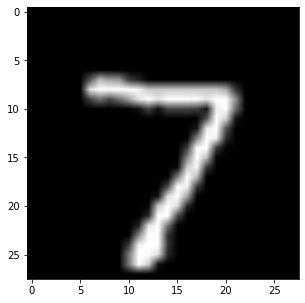

The prediction Of the neural net is:  7
The label was:  7


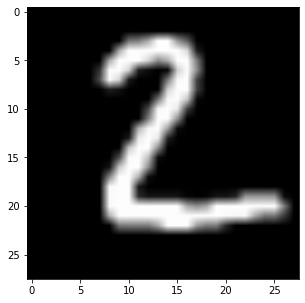

The prediction Of the neural net is:  2
The label was:  2


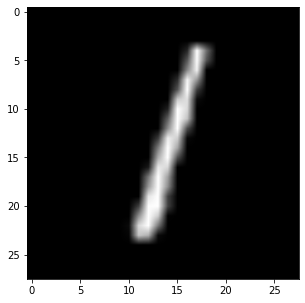

The prediction Of the neural net is:  1
The label was:  1


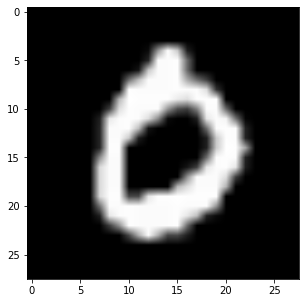

The prediction Of the neural net is:  0
The label was:  0


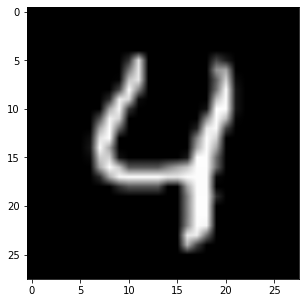

The prediction Of the neural net is:  4
The label was:  4


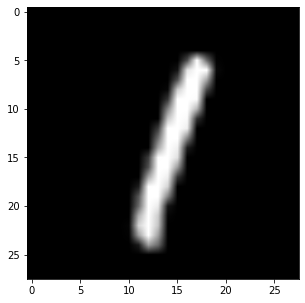

The prediction Of the neural net is:  1
The label was:  1


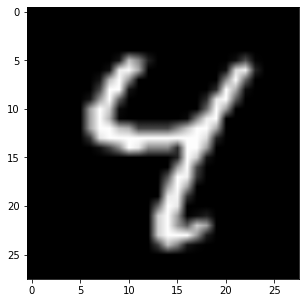

The prediction Of the neural net is:  4
The label was:  4


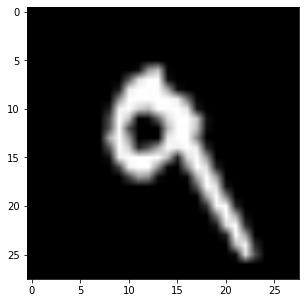

The prediction Of the neural net is:  9
The label was:  9


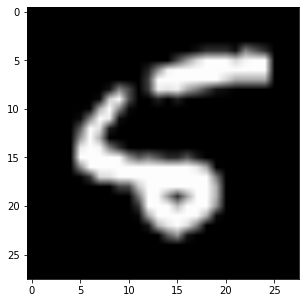

The prediction Of the neural net is:  5
The label was:  5


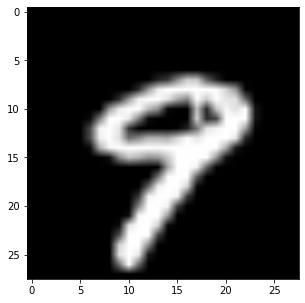

The prediction Of the neural net is:  9
The label was:  9


In [69]:
####### Testing the data with the trained model
import torch
import numpy as np
model = torch.load("./mnist_trained_fullyConnected_model.pt") #the data that I trained in an editor (no the above block)

imgs_raw = test_set[0] #if you wanna imshow it you have to reshape it but the neural net doesn't need to be reshaped because we trained it the same way by using the row-major order ,i guess its in row-major form so ---> to be reshaped by using np.reshape(imgs_raw,[28,28])
labels = test_set[1]
imgs = [np.reshape(imgs_raw[i],[28,28]) for i in range(len(imgs_raw))]


for i in range(len(imgs_raw)):
# for i in range(10):
    fig = plt.figure(figsize=(5,5))
    plt.imshow(imgs[i], interpolation='bilinear' , cmap='gray')
    plt.show()

    output = model(torch.tensor(imgs_raw[i]))
    output = output.detach().numpy()
    output = np.argmax(output)
    print("The prediction Of the neural net is: ",output)
    print("The label was: ",labels[i])